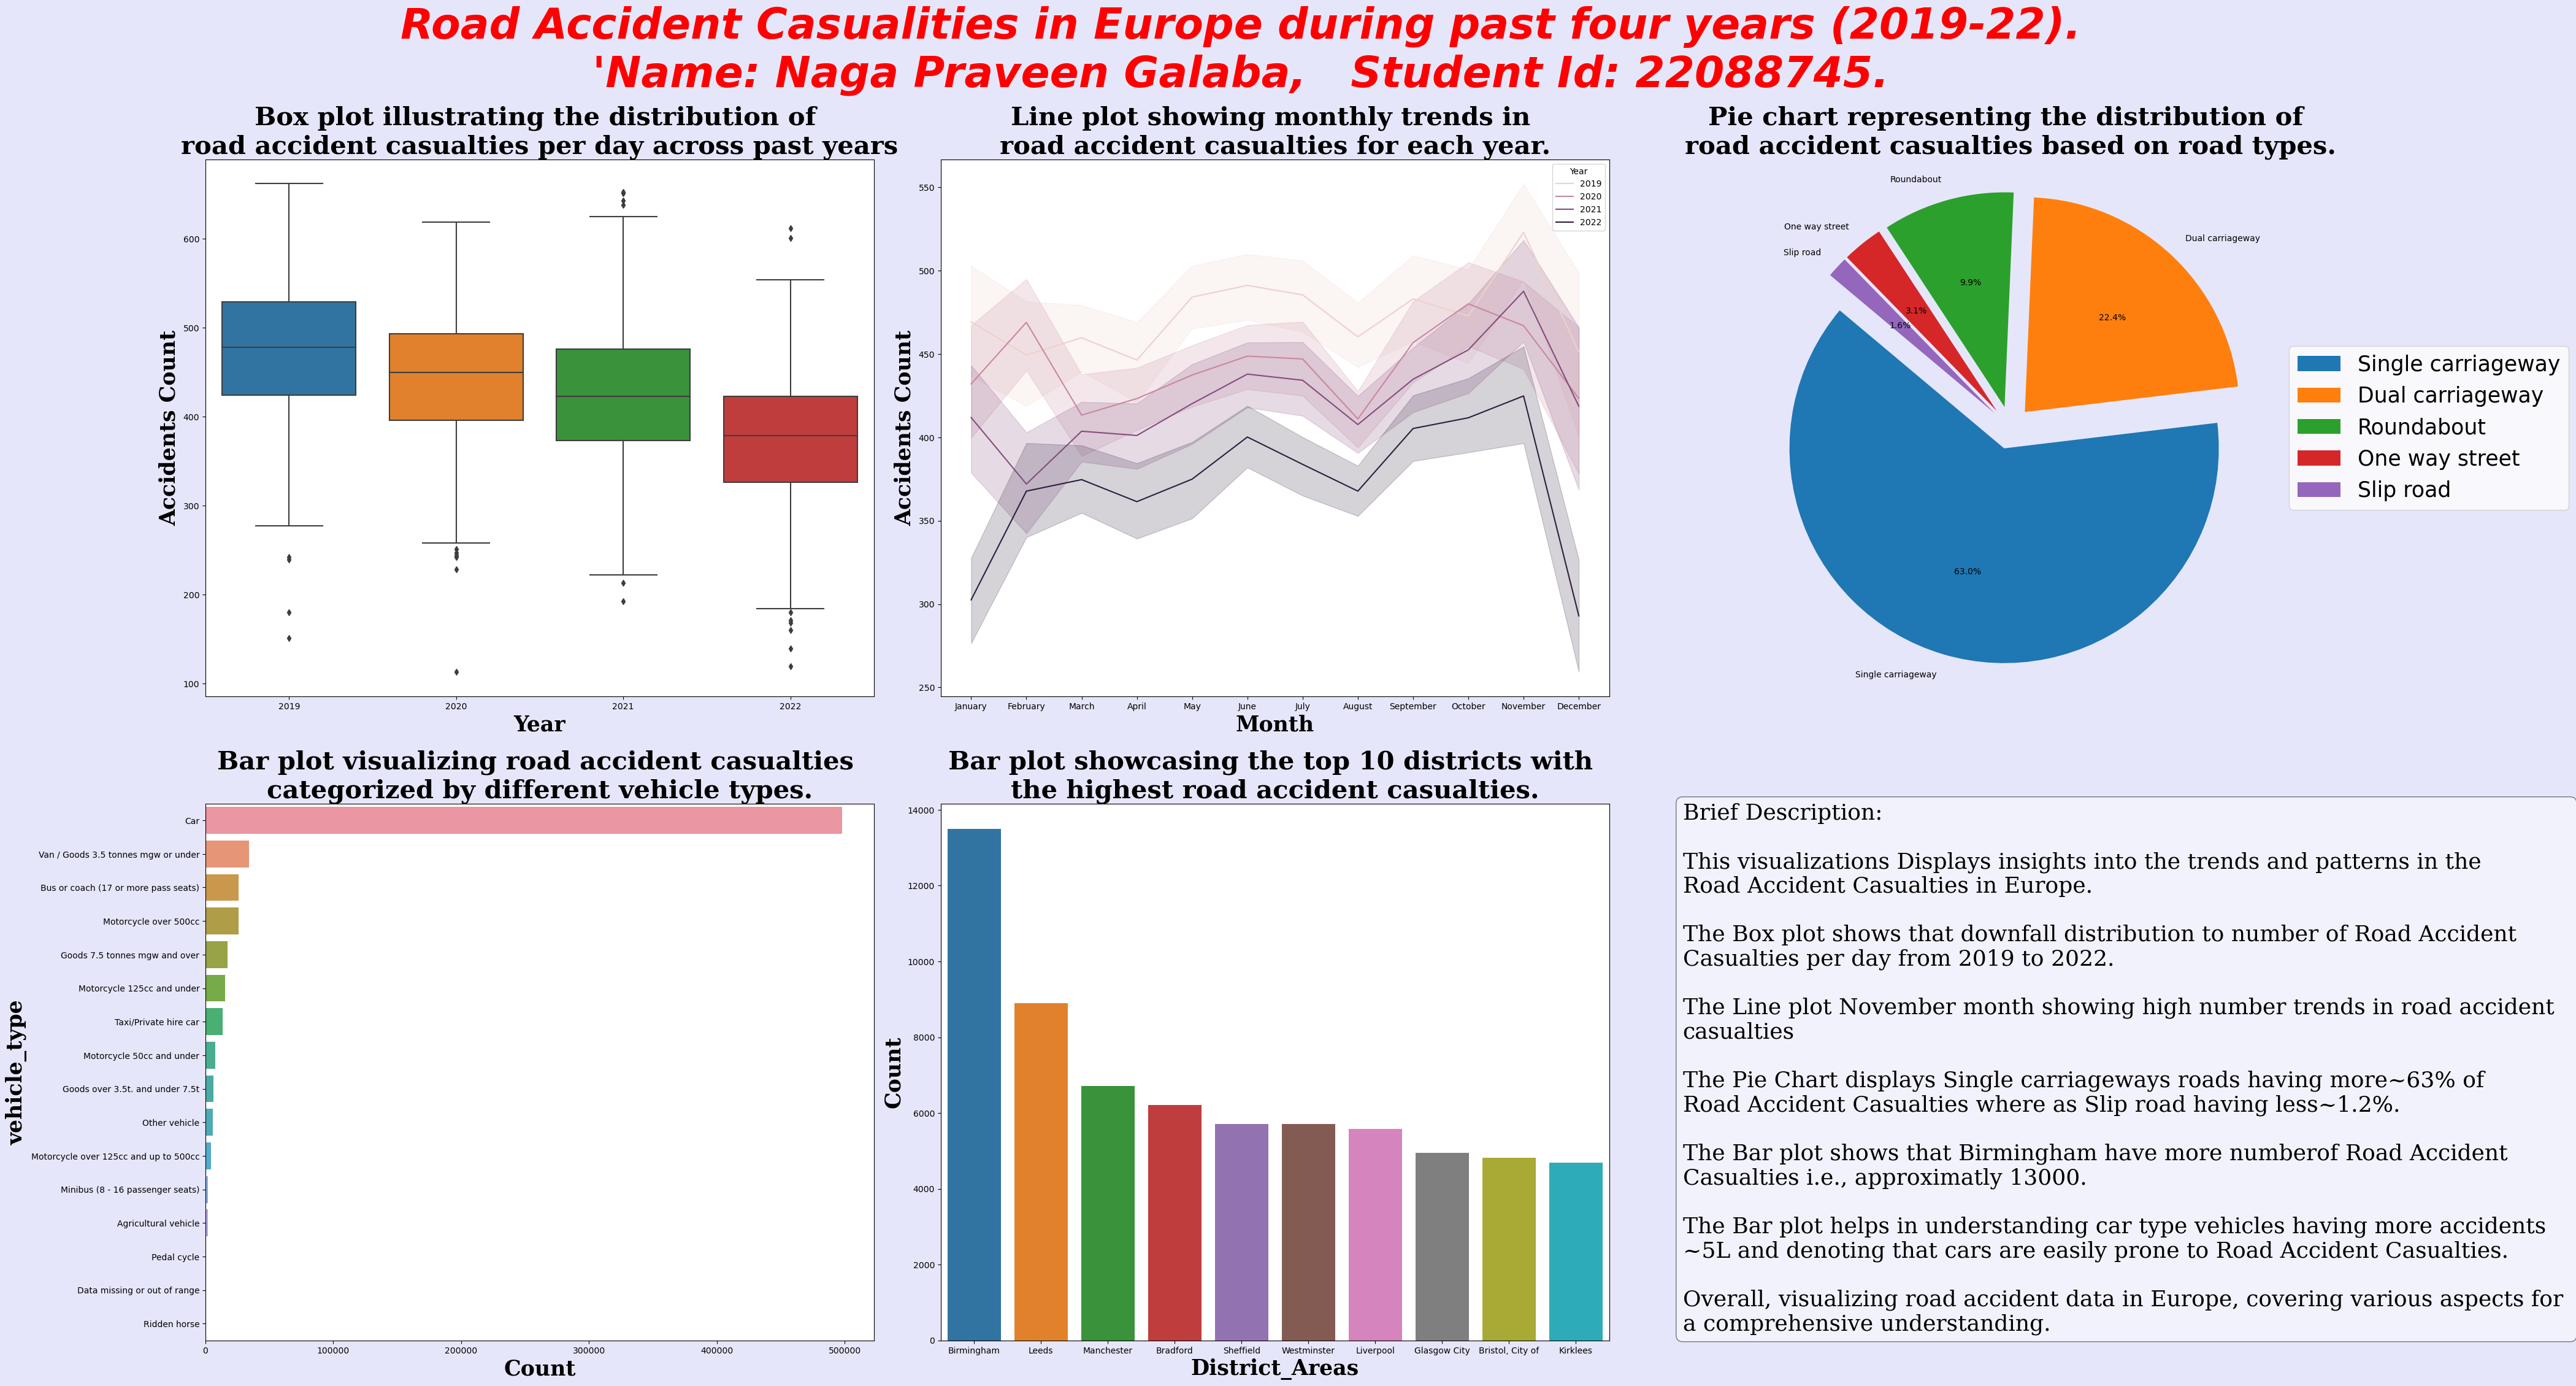

In [7]:
# Importing The Requir ed Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Reading Road Accident Casualities in Europe DataSet
#Dataset1
df = pd.read_csv('data_accident.csv')
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'], yearfirst=True)
df['Year'] = df['Accident_Date'].dt.year
df['Month'] = df['Accident_Date'].dt.strftime('%B')
df['Day'] = df['Accident_Date'].dt.day
df['Week_Day'] = df['Accident_Date'].dt.strftime('%A')
Accident_Data = df.groupby(['Accident_Date', 'Year', 'Month', 'Week_Day', 'Day'])[
    'Accident_Date'].count().reset_index(name='Count')
#Dataset2
District_Data = pd.read_csv('disctrit-area_accident.csv')
#Dataset3
Vehicle_Data = pd.read_csv('vehicule_type.csv')
#Dataset4
df1 = pd.read_csv('road_type- corrigir G-sheets.csv')
Road_Type_Data = df1['Road_Type'].value_counts(
    normalize=1).reset_index(name='% of Accidents/Million')
# Creating a grid of visualizations using GridSpec
fig = plt.figure(figsize=(45, 25), facecolor='lavender')
gs = gridspec.GridSpec(nrows=2, ncols=3, figure=fig, hspace=0.2, wspace=0.1)
# Title of the dashboard
fig.suptitle("Road Accident Casualities in Europe during past four years (2019-22).\n'Name: Naga Praveen Galaba,   Student Id: 22088745.",
             fontsize=50, color="Red", weight='bold', style='italic', fontfamily='sans-serif')
# plot 1
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(Accident_Data, x='Year', y='Count')
ax1.set_xlabel('Year', fontsize=25, fontweight='bold', fontfamily='serif')
ax1.set_ylabel('Accidents Count', fontsize=25,
               fontweight='bold', fontfamily='serif')
ax1.set_title('Box plot illustrating the distribution of \nroad accident casualties per day across past years',
              fontsize=30, fontweight='bold', fontfamily='serif')
# plot 2
ax2 = fig.add_subplot(gs[0, 1])
sns.lineplot(Accident_Data, x='Month', y='Count', hue='Year')
ax2.set_xlabel('Month', fontsize=25, fontweight='bold', fontfamily='serif')
ax2.set_ylabel('Accidents Count', fontsize=25,
               fontweight='bold', fontfamily='serif')
ax2.set_title("Line plot showing monthly trends in \nroad accident casualties for each year.",
              fontsize=30, fontweight='bold', fontfamily='serif')
# plot 3
ax3 = fig.add_subplot(gs[0, 2])
explode = (0.1, 0.1, 0.1, 0.1, 0.1,)
plt.pie(Road_Type_Data['% of Accidents/Million'], labels=Road_Type_Data['Road_Type'],
        explode=explode, autopct='%1.1f%%', startangle=140)
ax3.set_title('Pie chart representing the distribution of \nroad accident casualties based on road types.',
              fontsize=30, fontweight='bold', fontfamily='serif')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=25)
# plot 4
ax4 = fig.add_subplot(gs[1, 0])
sns.barplot(data=Vehicle_Data['Vehicle_Type'].value_counts(
).reset_index(name='Count'), y='Vehicle_Type', x='Count')
ax4.set_title('Bar plot visualizing road accident casualties \ncategorized by different vehicle types.',
              fontsize=30, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("Count", fontsize=25, fontweight='bold', fontfamily='serif')
ax4.set_ylabel("vehicle_type", fontsize=25,
               fontweight='bold', fontfamily='serif')
# plot 5
ax5 = fig.add_subplot(gs[1, 1])
sns.barplot(data=District_Data['District_Area'].value_counts().reset_index(
    name='Count').head(10), x='District_Area', y='Count')
ax5.set_title('Bar plot showcasing the top 10 districts with \nthe highest road accident casualties.',
              fontsize=30, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("District_Areas", fontsize=25,
               fontweight='bold', fontfamily='serif')
ax5.set_ylabel("Count", fontsize=25, fontweight='bold', fontfamily='serif')
#grid for overall explanation
ax6 = fig.add_subplot(gs[1, 2])
ax6.grid(False)
ax6.axis('off')
ax6.text(0.01, 0.01, 'Brief Description:\n \nThis visualizations Displays insights into the trends and patterns in the \nRoad Accident Casualties in Europe.\n \nThe Box plot shows that downfall distribution to number of Road Accident \nCasualties per day from 2019 to 2022.\n \nThe Line plot November month showing high number trends in road accident \ncasualties\n \nThe Pie Chart displays Single carriageways roads having more~63% of \nRoad Accident Casualties where as Slip road having less~1.2%.\n\nThe Bar plot shows that Birmingham have more numberof Road Accident \nCasualties i.e., approximatly 13000.\n \nThe Bar plot helps in understanding car type vehicles having more accidents \n~5L and denoting that cars are easily prone to Road Accident Casualties.\n \nOverall, visualizing road accident data in Europe, covering various aspects for \na comprehensive understanding.', transform=ax6.transAxes, fontsize=26,
         verticalalignment='bottom', fontfamily='serif', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5), visible=True)
plt.show()